In [1]:
#This project performs image classification on the CIFAR-10 dataset https://www.cs.toronto.edu/~kriz/cifar.html.

In [84]:
#First step is to open and explore the data.

#The website where the data is from provides the unpickle method below.
filename_batch1 = "/Users/developer/Documents/Udacity/DeepLearningFoundation/Project2_ImageClassification/deep-learning/image-classification/cifar-10-batches-py/data_batch_1"

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data_batch_1 = unpickle(filename_batch1)

#Let's look at the dictionaries keys
data_batch_1.keys()

dict_keys([b'filenames', b'labels', b'data', b'batch_label'])

In [85]:
#Let's look at the value for the filenames key.

#The link has info on the b before 'filenames'
#https://stackoverflow.com/questions/6269765/what-does-the-b-character-do-in-front-of-a-string-literal
data_batch_1[b'filenames']

[b'leptodactylus_pentadactylus_s_000004.png',
 b'camion_s_000148.png',
 b'tipper_truck_s_001250.png',
 b'american_elk_s_001521.png',
 b'station_wagon_s_000293.png',
 b'coupe_s_001735.png',
 b'cassowary_s_001300.png',
 b'cow_pony_s_001168.png',
 b'sea_boat_s_001584.png',
 b'tabby_s_001355.png',
 b'muntjac_s_001000.png',
 b'arabian_s_001354.png',
 b'quarter_horse_s_000672.png',
 b'passerine_s_000343.png',
 b'camion_s_001895.png',
 b'trailer_truck_s_000335.png',
 b'dumper_s_000821.png',
 b'alley_cat_s_000200.png',
 b'accentor_s_000677.png',
 b'frog_s_001671.png',
 b'capreolus_capreolus_s_000051.png',
 b'tomcat_s_000772.png',
 b'pickerel_frog_s_000446.png',
 b'bufo_s_001242.png',
 b'cassowary_s_001246.png',
 b'toad_s_001748.png',
 b'cat_s_000081.png',
 b'chihuahua_s_000825.png',
 b'alces_alces_s_000959.png',
 b'stealth_bomber_s_000554.png',
 b'twinjet_s_000663.png',
 b'trucking_rig_s_001402.png',
 b'auto_s_000609.png',
 b'tabby_cat_s_000983.png',
 b'wapiti_s_000416.png',
 b'monoplane_s_000

In [86]:
#Let's look at the value for the labels key.
#The data's website says it's a list with 1000 elements.
#Let's verify and print a few of the items in the list.
#If the labels seem ordered, we need to shuffle the training data.
print(type(data_batch_1[b'labels']))
print(len(data_batch_1[b'labels']))
data_batch_1[b'labels'][:25]

<class 'list'>
10000


[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2]

In [87]:
#Let's look at the value for the data key.
print(type(data_batch_1[b'data']))
print(data_batch_1[b'data'].shape)
print(data_batch_1[b'data'])

<class 'numpy.ndarray'>
(10000, 3072)
[[ 59  43  50 ..., 140  84  72]
 [154 126 105 ..., 139 142 144]
 [255 253 253 ...,  83  83  84]
 ..., 
 [ 71  60  74 ...,  68  69  68]
 [250 254 211 ..., 215 255 254]
 [ 62  61  60 ..., 130 130 131]]


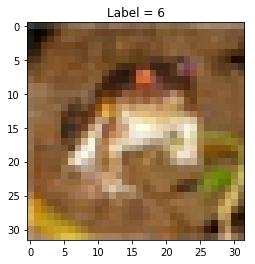

In [97]:
#The data's website says each row of data_batch_1[b'data'] is a 32x32 color image.
#Notice there are 3072 columns and 32*32*3 = 3072 which is consistent b/c each of the 32x32
#pixels will have 3 elements (rgb).
#Let's verify.
row0 = data_batch_1[b'data'][0,:]
red = row0[:1024].reshape(32,32)
green = row0[1024:1024*2].reshape(32,32)
blue = row0[1024*2:1024*3].reshape(32,32)
import numpy as np
img = np.dstack((red,green,blue))

import matplotlib.pyplot as plt
plt.imshow(img),plt.title('Label = {}'.format(data_batch_1[b'labels'][0]))
plt.show()
#Since the image is only 32x32 it's difficult to see what it is.
#The name of the file is obtained from data_batch_1[b'filenames'][0] and is
#leptodactylus_pentadactylus_s_000004.png
#Google the name of the file w/o the .png and look at the images.
#The frog images look like what is shown in the image below.

In [89]:
#Only the values of the batch_label key are left to inspect.
data_batch_1[b'batch_label']
#This appears to just be a string describing the data_batch_1 file which we unpickled from
#filename_batch1.

b'training batch 1 of 5'

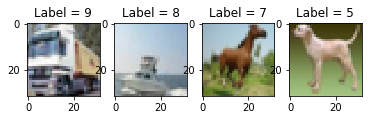

In [96]:
#Let's create a handy function to turn a row of the data into an rgb image
def row_of_data_to_rgb_img(data_batch_x, row_num):
    
    row = data_batch_x[b'data'][row_num,:]
    red = row[:1024].reshape(32,32)
    green = row[1024:1024*2].reshape(32,32)
    blue = row[1024*2:1024*3].reshape(32,32)
    img = np.dstack((red,green,blue))
    
    return img

#Let's use the function to check a few more images.
img1 = row_of_data_to_rgb_img(data_batch_1, 1)
img100 = row_of_data_to_rgb_img(data_batch_1, 100)
img256 = row_of_data_to_rgb_img(data_batch_1, 256)
img9999 = row_of_data_to_rgb_img(data_batch_1, 9999)

plt.subplot(1,4,1), plt.imshow(img1), plt.title('Label = {}'.format(data_batch_1[b'labels'][1]))
plt.subplot(1,4,2), plt.imshow(img100), plt.title('Label = {}'.format(data_batch_1[b'labels'][100]))
plt.subplot(1,4,3), plt.imshow(img256),  plt.title('Label = {}'.format(data_batch_1[b'labels'][256]))
plt.subplot(1,4,4), plt.imshow(img9999), plt.title('Label = {}'.format(data_batch_1[b'labels'][9999]))



plt.show()

In [54]:
#The above pictures look good.

#It would be good to also verify data in the other data batch files:
#cifar-10-batches-py/data_batch_2
#cifar-10-batches-py/data_batch_3
#cifar-10-batches-py/data_batch_4
#cifar-10-batches-py/data_batch_5

#For now let's not include that in this notebook.

#However, let's inspect the test_batch.
filename_test_batch= "/Users/developer/Documents/Udacity/DeepLearningFoundation/Project2_ImageClassification/deep-learning/image-classification/cifar-10-batches-py/test_batch"
test_batch = unpickle(filename_test_batch)
print(type(test_batch))
print(test_batch.keys())

<class 'dict'>
dict_keys([b'filenames', b'labels', b'data', b'batch_label'])


In [59]:
#Let's not inspect all the keys.
#Let's inspect the values for the data key.
print(type(test_batch[b'data']))
print(test_batch[b'data'].shape)
print(test_batch[b'data'])

<class 'numpy.ndarray'>
(10000, 3072)
[[158 159 165 ..., 124 129 110]
 [235 231 232 ..., 178 191 199]
 [158 158 139 ...,   8   3   7]
 ..., 
 [ 20  19  15 ...,  50  53  47]
 [ 25  15  23 ...,  80  81  80]
 [ 73  98  99 ...,  94  58  26]]


In [65]:
#Let's look at some of the values for the labels key.
print(test_batch[b'labels'][:25])

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5]


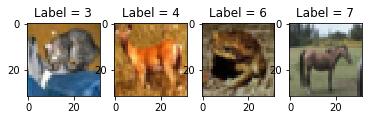

In [78]:
#Let's look at some of the data as images.
test_img0 = row_of_data_to_rgb_img(test_batch, 0)
test_img110 = row_of_data_to_rgb_img(test_batch, 110)
test_img300 = row_of_data_to_rgb_img(test_batch, 300)
test_img9999 = row_of_data_to_rgb_img(test_batch, 9999)

plt.subplot(1,4,1), plt.imshow(test_img0), plt.title('Label = {}'.format(test_batch[b'labels'][0]))
plt.subplot(1,4,2), plt.imshow(test_img110), plt.title('Label = {}'.format(test_batch[b'labels'][110]))
plt.subplot(1,4,3), plt.imshow(test_img300), plt.title('Label = {}'.format(test_batch[b'labels'][300]))
plt.subplot(1,4,4), plt.imshow(test_img9999), plt.title('Label = {}'.format(test_batch[b'labels'][9999]))

plt.show()

In [75]:
#The above picture look good.

#However let's load the data file with info on the labels names and check if the assigned
#label #'s match the images.
filename_batches_meta = "/Users/developer/Documents/Udacity/DeepLearningFoundation/Project2_ImageClassification/deep-learning/image-classification/cifar-10-batches-py/batches.meta"
batches_meta = unpickle(filename_batches_meta)
print(type(batches_meta))
print(batches_meta.keys())

import pprint
print(pprint.pprint(batches_meta))

<class 'dict'>
dict_keys([b'num_vis', b'num_cases_per_batch', b'label_names'])
{b'label_names': [b'airplane',
                  b'automobile',
                  b'bird',
                  b'cat',
                  b'deer',
                  b'dog',
                  b'frog',
                  b'horse',
                  b'ship',
                  b'truck'],
 b'num_cases_per_batch': 10000,
 b'num_vis': 3072}
None


In [98]:
#Comparing the label names in batches_meta['label_names'] with the label numbers for the images
#displayed above shows they agree (i.e. the picture of a horse has label 7 and the 7th item
# in batches_meta['label_names'] is horse).
#Also if you check the data_batch_1 images plotted above against the label number, you will see
#they agree with the label names in batches_meta['label_names'] too.

In [117]:
#We will want the data to be normalized, so let's build a function.
def normalize(x):
    """
    Normalize an array of sample image data in the range of 0 to 1
    : x: Numpy array of image data. x.shape is (n_images, 32, 32, 3)
    :    The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    
    theMin = 0  #not needed since it's 0, but keep for clarity
    theMax = 255
    
    #Returning x/(theMax-theMin) doesn't guarantee the min of each image will be 0.
    #However, since the images are uint8, returning x/(theMax-theMin) will gurantee the max
    #of each image to be <= 1.
    return x/(theMax-theMin)

#We will also want to one-hot encode the labels.
from sklearn.preprocessing import LabelBinarizer

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """

    labelBinarizer = LabelBinarizer()
    labelBinarizer.fit(range(10))
    oneHotEncodedList = labelBinarizer.transform(x)
    
    return oneHotEncodedList

#Here is an example of one-hot encoding
example_one_hot_encoding = one_hot_encode([3,4,5,9])
print(example_one_hot_encoding)

[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]
